In [10]:
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
data = pd.concat([train, test], sort=True)
data.reset_index(inplace=True, drop=True)


In [11]:
data.head(5)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0   NaN             3     1Fam       TA   
1      1262         0          0   NaN             3     1Fam       TA   
2       920       866          0   NaN             3     1Fam       TA   
3       961       756          0   NaN             3     1Fam       Gd   
4      1145      1053          0   NaN             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleType ScreenPorch  Street  \
0           No       706.0         0.0  ...       WD           0    Pave   
1           Gd       978.0         0.0  ...       WD           0    Pave   
2           Mn       486.0         0.0  ...       WD           0    Pave   
3           No       216.0         0.0  ...       WD           0    Pave   
4           Av       655.0         0.0  ...       WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0             8       856.0     AllPub          0      2003         2003   
1             6      1262.0     AllPub        298      1976         1976   
2             6       920.0     AllPub          0      2001         2002   
3             7       756.0     AllPub          0      1915         1970   
4             9      1145.0     AllPub        192      2000         2000   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  

[5 rows x 81 columns]

In [12]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [13]:
# Recherche des valeurs null dans la colonne SalePrice
# Je me base sur le jeu de donnée train pour la recherche des valeurs null
print(data['SalePrice'].isnull().sum())
print(train['SalePrice'].isnull().sum())

1459
0


In [14]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(train['SalePrice'])
plt.title('Kurtosis : ' +str(train['SalePrice'].kurtosis()) + ' Skewness : ' + str(train['SalePrice'].skew()))
plt.show()

C:\Users\GIALETOT\AppData\Local\Temp\ipykernel_19464\454018627.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


In [16]:
# Vérification du bon format des colonnes
# On supprime la colonne SalePrice
data.drop('SalePrice', axis=1, inplace=True)

In [17]:
data['1stFlrSF'].head(5)

0     856
1    1262
2     920
3     961
4    1145
Name: 1stFlrSF, dtype: int64

In [18]:
echantillonColonne = []
for i in data.columns:
    echantillonColonne.append(data[i].head(5))
echantillonColonne[0:5]

[0     856
 1    1262
 2     920
 3     961
 4    1145
 Name: 1stFlrSF, dtype: int64,
 0     854
 1       0
 2     866
 3     756
 4    1053
 Name: 2ndFlrSF, dtype: int64,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: 3SsnPorch, dtype: int64,
 0    NaN
 1    NaN
 2    NaN
 3    NaN
 4    NaN
 Name: Alley, dtype: object,
 0    3
 1    3
 2    3
 3    3
 4    4
 Name: BedroomAbvGr, dtype: int64]

In [19]:
d = {'colonne': list(data.columns), 'type': list(data.dtypes), 'echantillon': echantillonColonne}
colonnesTypes = pd.DataFrame(data=d)
pd.options.display.max_rows = 81
colonnesTypes

colonne     type                                        echantillon
0        1stFlrSF    int64  0     856
1    1262
2     920
3     961
4    1...
1        2ndFlrSF    int64  0     854
1       0
2     866
3     756
4    1...
2       3SsnPorch    int64  0    0
1    0
2    0
3    0
4    0
Name: 3SsnP...
3           Alley   object  0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
N...
4    BedroomAbvGr    int64  0    3
1    3
2    3
3    3
4    4
Name: Bedro...
5        BldgType   object  0    1Fam
1    1Fam
2    1Fam
3    1Fam
4    1...
6        BsmtCond   object  0    TA
1    TA
2    TA
3    Gd
4    TA
Name: ...
7    BsmtExposure   object  0    No
1    Gd
2    Mn
3    No
4    Av
Name: ...
8      BsmtFinSF1  float64  0    706.0
1    978.0
2    486.0
3    216.0
4 ...
9      BsmtFinSF2  float64  0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
N...
10   BsmtFinType1   object  0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
N...
11   BsmtFinType2   object  0    Unf
1    Unf
2    Unf
3    Unf
4    Unf
N...
12   BsmtFullBath  float64  0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
N...
13   BsmtHalfBath  float64  0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
N...
14       BsmtQual   object  0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: ...
15      BsmtUnfSF  float64  0    150.0
1    284.0
2    434.0
3    540.0
4 ...
16     CentralAir   object  0    Y
1    Y
2    Y
3    Y
4    Y
Name: Centr...
17     Condition1   object  0     Norm
1    Feedr
2     Norm
3     Norm
4 ...
18     Condition2   object  0    Norm
1    Norm
2    Norm
3    Norm
4    N...
19     Electrical   object  0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4 ...
20  EnclosedPorch    int64  0      0
1      0
2      0
3    272
4      0
N...
21      ExterCond   object  0    TA
1    TA
2    TA
3    TA
4    TA
Name: ...
22      ExterQual   object  0    Gd
1    TA
2    Gd
3    TA
4    Gd
Name: ...
23    Exterior1st   object  0    VinylSd
1    MetalSd
2    VinylSd
3    Wd...
24    Exterior2nd   object  0    VinylSd
1    MetalSd
2    VinylSd
3    Wd...
25          Fence   object  0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
N...
26    FireplaceQu   object  0    NaN
1     TA
2     TA
3     Gd
4     TA
N...
27     Fireplaces    int64  0    0
1    1
2    1
3    1
4    1
Name: Firep...
28     Foundation   object  0     PConc
1    CBlock
2     PConc
3    BrkTi...
29       FullBath    int64  0    2
1    2
2    2
3    1
4    2
Name: FullB...
30     Functional   object  0    Typ
1    Typ
2    Typ
3    Typ
4    Typ
N...
31     GarageArea  float64  0    548.0
1    460.0
2    608.0
3    642.0
4 ...
32     GarageCars  float64  0    2.0
1    2.0
2    2.0
3    3.0
4    3.0
N...
33     GarageCond   object  0    TA
1    TA
2    TA
3    TA
4    TA
Name: ...
34   GarageFinish   object  0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
N...
35     GarageQual   object  0    TA
1    TA
2    TA
3    TA
4    TA
Name: ...
36     GarageType   object  0    Attchd
1    Attchd
2    Attchd
3    Detch...
37    GarageYrBlt  float64  0    2003.0
1    1976.0
2    2001.0
3    1998....
38      GrLivArea    int64  0    1710
1    1262
2    1786
3    1717
4    2...
39       HalfBath    int64  0    1
1    0
2    1
3    0
4    1
Name: HalfB...
40        Heating   object  0    GasA
1    GasA
2    GasA
3    GasA
4    G...
41      HeatingQC   object  0    Ex
1    Ex
2    Ex
3    Gd
4    Ex
Name: ...
42     HouseStyle   object  0    2Story
1    1Story
2    2Story
3    2Stor...
43             Id    int64  0    1
1    2
2    3
3    4
4    5
Name: Id, d...
44   KitchenAbvGr    int64  0    1
1    1
2    1
3    1
4    1
Name: Kitch...
45    KitchenQual   object  0    Gd
1    TA
2    Gd
3    Gd
4    Gd
Name: ...
46    LandContour   object  0    Lvl
1    Lvl
2    Lvl
3    Lvl
4    Lvl
N...
47      LandSlope   object  0    Gtl
1    Gtl
2    Gtl
3    Gtl
4    Gtl
N...
48        LotArea    int64  0     8450
1     9600
2    11250
3     9550
4 ...
49      LotConfig   object  0    Inside
1       FR2
2    Inside
3    Corne...
50    LotFrontage  float64  0   

In [20]:
# rechercher de valeurs manquantes dans les colonnes
data_na = (data.isnull().sum() / len(data)) * 100
data_na

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.216855
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtFinType1      2.706406
BsmtFinType2      2.740665
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
BsmtQual          2.774923
BsmtUnfSF         0.034258
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034258
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
Fence            80.438506
FireplaceQu      48.646797
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.068517
GarageArea        0.034258
GarageCars        0.034258
GarageCond        5.447071
GarageFinish      5.447071
GarageQual        5.447071
GarageType        5.378554
G

In [21]:
# supprimer les colonnes avec un taux à 0%
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data

Missing Ratio
PoolQC            99.657417
MiscFeature       96.402878
Alley             93.216855
Fence             80.438506
MasVnrType        60.500171
FireplaceQu       48.646797
LotFrontage       16.649538
GarageQual         5.447071
GarageYrBlt        5.447071
GarageFinish       5.447071
GarageCond         5.447071
GarageType         5.378554
BsmtExposure       2.809181
BsmtCond           2.809181
BsmtQual           2.774923
BsmtFinType2       2.740665
BsmtFinType1       2.706406
MasVnrArea         0.787941
MSZoning           0.137033
Utilities          0.068517
Functional         0.068517
BsmtHalfBath       0.068517
BsmtFullBath       0.068517
GarageCars         0.034258
Exterior2nd        0.034258
Exterior1st        0.034258
KitchenQual        0.034258
Electrical         0.034258
BsmtUnfSF          0.034258
BsmtFinSF2         0.034258
BsmtFinSF1         0.034258
SaleType           0.034258
TotalBsmtSF        0.034258
GarageArea         0.034258

In [22]:
data[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']].head(8)

PoolQC MiscFeature Alley  Fence FireplaceQu
0    NaN         NaN   NaN    NaN         NaN
1    NaN         NaN   NaN    NaN          TA
2    NaN         NaN   NaN    NaN          TA
3    NaN         NaN   NaN    NaN          Gd
4    NaN         NaN   NaN    NaN          TA
5    NaN        Shed   NaN  MnPrv         NaN
6    NaN         NaN   NaN    NaN          Gd
7    NaN        Shed   NaN    NaN          TA

In [23]:
data[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']] = data[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']].fillna('None')
data[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']].head(8)

PoolQC MiscFeature Alley  Fence FireplaceQu
0   None        None  None   None        None
1   None        None  None   None          TA
2   None        None  None   None          TA
3   None        None  None   None          Gd
4   None        None  None   None          TA
5   None        Shed  None  MnPrv        None
6   None        None  None   None          Gd
7   None        Shed  None   None          TA

In [24]:
# Visualisation des données LotFrontage non nulles
sns.displot(data['LotFrontage'][data['LotFrontage'].notnull()])

In [25]:
# Visualisation des données LotFrontage > 150
sns.displot(data['LotFrontage'][data['LotFrontage'].notnull()]>150)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


In [26]:
data['LotFrontage'].median()

68.0

In [27]:
# remplace une variable numérique manquante par sa médiane ou sa moyenne
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7    68.0
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [28]:
# Toutes les valeurs manquantes relatives au garage sont liées à l'absence de garage
data[['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType','GarageYrBlt','GarageArea', 'GarageCars']].head(10)

GarageCond GarageQual GarageFinish GarageType  GarageYrBlt  GarageArea  \
0         TA         TA          RFn     Attchd       2003.0       548.0   
1         TA         TA          RFn     Attchd       1976.0       460.0   
2         TA         TA          RFn     Attchd       2001.0       608.0   
3         TA         TA          Unf     Detchd       1998.0       642.0   
4         TA         TA          RFn     Attchd       2000.0       836.0   
5         TA         TA          Unf     Attchd       1993.0       480.0   
6         TA         TA          RFn     Attchd       2004.0       636.0   
7         TA         TA          RFn     Attchd       1973.0       484.0   
8         TA         Fa          Unf     Detchd       1931.0       468.0   
9         TA         Gd          RFn     Attchd       1939.0       205.0   

   GarageCars  
0         2.0  
1         2.0  
2         2.0  
3         3.0  
4         3.0  
5         2.0  
6         2.0  
7         2.0  
8         2.0  
9         1.0

In [29]:
# remplace les valeurs qualitatives par None et les valeurs quantitatives par 0
data[['GarageType','GarageFinish','GarageQual','GarageCond']] = data[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('None')
data[['GarageYrBlt','GarageArea','GarageCars']] = data[['GarageYrBlt','GarageArea','GarageCars']].fillna(0)

In [30]:
# Faire la même chose pour les autres colonnes
data[['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']] = data[['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']].fillna('None')
data[['MasVnrArea','MasVnrType']] = data[['MasVnrArea','MasVnrType']].fillna(0)
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data['Utilities'] = data['Utilities'].fillna(data['Utilities'].mode()[0])
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSSubClass'] = data['MSSubClass'].fillna("None")
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(0)
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(0)
data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(0)

In [31]:
# Vérification des valeurs manquantes
data_na = (data.isnull().sum() / len(data)) * 100
data_na

1stFlrSF         0.0
2ndFlrSF         0.0
3SsnPorch        0.0
Alley            0.0
BedroomAbvGr     0.0
BldgType         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
BsmtQual         0.0
BsmtUnfSF        0.0
CentralAir       0.0
Condition1       0.0
Condition2       0.0
Electrical       0.0
EnclosedPorch    0.0
ExterCond        0.0
ExterQual        0.0
Exterior1st      0.0
Exterior2nd      0.0
Fence            0.0
FireplaceQu      0.0
Fireplaces       0.0
Foundation       0.0
FullBath         0.0
Functional       0.0
GarageArea       0.0
GarageCars       0.0
GarageCond       0.0
GarageFinish     0.0
GarageQual       0.0
GarageType       0.0
GarageYrBlt      0.0
GrLivArea        0.0
HalfBath         0.0
Heating          0.0
HeatingQC        0.0
HouseStyle       0.0
Id               0.0
KitchenAbvGr     0.0
KitchenQual      0.0
LandContour      0.0
LandSlope    

In [32]:
# Est-ce que l'information contenue dans une des colonnes ne peut pas être correlée au prix de la maison ?

data['Id'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

In [33]:
# On supprime la colonne Id
data.drop('Id', axis=1, inplace=True)

In [34]:
# On regarde les colonnes qui ont des valeurs numériques sont réellement numériques
data[['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']].head(5)

MSSubClass  OverallCond  YrSold  MoSold
0          60            5    2008       2
1          20            8    2007       5
2          60            5    2008       9
3          70            5    2006       2
4          60            5    2008      12

In [35]:
# On transforme les colonnes MSSubClass, OverallCond, YrSold, MoSold en colonnes de type object
data[['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']] = data[['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']].astype('object')
data[['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']].head(5)

MSSubClass OverallCond YrSold MoSold
0         60           5   2008      2
1         20           8   2007      5
2         60           5   2008      9
3         70           5   2006      2
4         60           5   2008     12

In [36]:
# feature modeling
# Visualisation des colonnes YearBuilt et YearRemodAdd
data[['YearBuilt', 'YearRemodAdd']].head(5)

YearBuilt  YearRemodAdd
0       2003          2003
1       1976          1976
2       2001          2002
3       1915          1970
4       2000          2000

In [37]:
import datetime
current_date = datetime.datetime.now().year
current_date

2023

In [38]:
data['years since last remod'] = current_date - data['YearRemodAdd']
data.drop(['YearRemodAdd', 'YearBuilt'], axis=1, inplace=True)
data['years since last remod'].head(3)

0    20
1    47
2    21
Name: years since last remod, dtype: int64

In [39]:
data['years since last remod']

0       20
1       47
2       21
3       53
4       23
        ..
2914    53
2915    53
2916    27
2917    31
2918    29
Name: years since last remod, Length: 2919, dtype: int64

In [40]:
# Préparation des datasets pour le modèle de machine learning

In [41]:
dataset = data.loc[:1459,:]

In [42]:
pd.options.mode.chained_assignment = None
dataset['SalePrice'] = train['SalePrice']

In [43]:
dataset.head(5)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0  None             3     1Fam       TA   
1      1262         0          0  None             3     1Fam       TA   
2       920       866          0  None             3     1Fam       TA   
3       961       756          0  None             3     1Fam       Gd   
4      1145      1053          0  None             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleType ScreenPorch  Street  \
0           No       706.0         0.0  ...       WD           0    Pave   
1           Gd       978.0         0.0  ...       WD           0    Pave   
2           Mn       486.0         0.0  ...       WD           0    Pave   
3           No       216.0         0.0  ...       WD           0    Pave   
4           Av       655.0         0.0  ...       WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YrSold  \
0             8       856.0     AllPub          0   2008   
1             6      1262.0     AllPub        298   2007   
2             6       920.0     AllPub          0   2008   
3             7       756.0     AllPub          0   2006   
4             9      1145.0     AllPub        192   2008   

  years since last remod SalePrice  
0                     20    208500  
1                     47    181500  
2                     21    223500  
3                     53    140000  
4                     23    250000  

[5 rows x 79 columns]

In [44]:
import random
random_indices = random.sample(range(0, len(dataset)), k=len(dataset))
dataset.iloc[random_indices].head(5)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
1108       948       742          0  None             3     1Fam       TA   
958       1337         0          0  None             3     1Fam       TA   
296        910       648          0  None             4     1Fam       TA   
489        630         0          0  None             1    Twnhs       TA   
1262      1104       684          0  None             5     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleType ScreenPorch  Street  \
1108           No         0.0         0.0  ...       WD           0    Pave   
958            Mn       699.0         0.0  ...       WD           0    Pave   
296            No       420.0         0.0  ...       WD           0    Pave   
489            Av       515.0         0.0  ...       WD           0    Pave   
1262           Av         0.0         0.0  ...       WD           0    Pave   

      TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YrSold  \
1108             7       924.0     AllPub        100   2007   
958              6      1337.0     AllPub          0   2007   
296              6       910.0     AllPub        289   2007   
489              3       630.0     AllPub          0   2009   
1262             8      1104.0     AllPub        120   2009   

     years since last remod SalePrice  
1108                     23    181000  
958                      20    185000  
296                      73    152000  
489                      21     86000  
1262                     34    161500  

[5 rows x 79 columns]

In [45]:
random.seed(1)
random_indices = random.sample(range(0, len(dataset)), k=len(dataset))
datasetR = dataset.iloc[random_indices]
datasetR.head(5)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
275        952       596          0  None             3     1Fam       TA   
1165      1502         0          0  None             3     1Fam       TA   
129       1053         0        180  None             3     1Fam       TA   
522       1004       660          0  None             3     1Fam       TA   
241        866         0          0  None             2     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleType ScreenPorch  Street  \
275            No         0.0         0.0  ...       WD         144    Pave   
1165           No         0.0         0.0  ...      New           0    Pave   
129            No       567.0        28.0  ...       WD           0    Pave   
522            No       399.0         0.0  ...       WD           0    Pave   
241            No       329.0         0.0  ...       WD           0    Pave   

      TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YrSold  \
275              5       952.0     AllPub         74   2009   
1165             7      1502.0     AllPub          0   2009   
129              6      1008.0     AllPub          0   2006   
522              7      1004.0     AllPub          0   2006   
241              4       686.0     AllPub         58   2007   

     years since last remod SalePrice  
275                      16    205000  
1165                     14    233170  
129                      32    150000  
522                      73    159000  
241                      26    110500  

[5 rows x 79 columns]

In [46]:
datasetR.reset_index(drop=True, inplace=True)
datasetR.drop(['index'], axis=1, inplace=True)
datasetR.head(5)

KeyError: "['index'] not found in axis"

In [47]:
cut = round(len(datasetR)*0.8) # 80% des données
cut

1168

In [48]:
ds_train = datasetR.iloc[:cut,:].reset_index() # 80% des données
ds_test = datasetR.iloc[cut:,:] # 20% des données

In [ ]:
# Premier modèle de prédiction avec une regression uni-variée

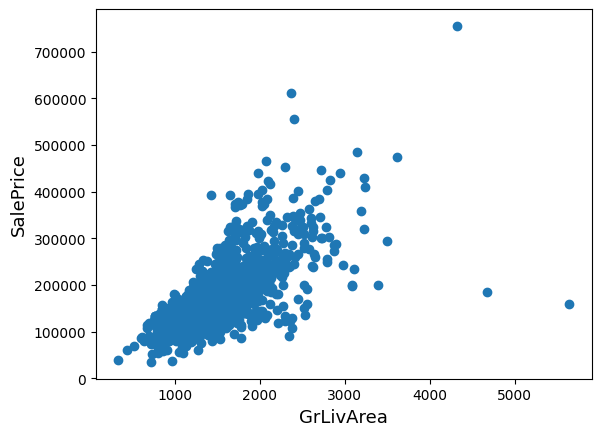

In [49]:
# Visualisation des jeux de données
fig, ax = plt.subplots()
ax.scatter(x=ds_train['GrLivArea'], y=ds_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [50]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Création du modèle
lr = linear_model.LinearRegression()
# Entrainement du modèle
lr.fit(ds_train[['GrLivArea']], ds_train['SalePrice'])
prediction = lr.predict(ds_test[['GrLivArea']])
prediction[0:5]

array([136846.02292284, 141626.33087422, 207355.56520564, 167021.7168659 ,
       135949.71518196])

In [51]:
# Calcul de l'erreur
rmse = mean_squared_error(ds_test['SalePrice'], prediction)**(1/2)
rmse

61735.123131297274

In [ ]:
'''def linearRegression(datasetR, fit, toPredict):
    cut = round(len(datasetR)*0.8) # 80% des données
    ds_train = datasetR.iloc[:cut,:].reset_index()
    ds_test = datasetR.iloc[cut:,:] # 20% des données
    # Création du modèle
    lr = linear_model.LinearRegression()
    # Entrainement du modèle
    lr.fit(ds_train[[fit]], ds_train[toPredict])
    prediction = lr.predict(ds_test[[fit]])
    # Calcul de l'erreur
    rmse = mean_squared_error(ds_test[toPredict], prediction)**(1/2)
    return rmse
linearRegression(datasetR, 'GrLivArea', 'SalePrice')'''

# Normalisation des données

In [52]:
datasetR.select_dtypes(include=['int64', 'float64']).head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       952       596          0             3         0.0         0.0   
1      1502         0          0             3         0.0         0.0   
2      1053         0        180             3       567.0        28.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  MiscVal  \
0           0.0           0.0      952.0              0  ...        0   
1           0.0           0.0     1502.0              0  ...        0   
2           0.0           1.0      413.0              0  ...        0   

   OpenPorchSF  OverallQual  PoolArea  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  \
0            0            7         0          144             5        952.0   
1          114            7         0            0             7       1502.0   
2           80            5         0            0             6       1008.0   

   WoodDeckSF  years since last remod  SalePrice  
0          74                      16     205000  
1           0                      14     233170  
2           0                      32     150000  

[3 rows x 32 columns]

In [53]:
fullListNumberAndPrice = list(datasetR.select_dtypes(include=['int64', 'float64']).columns)
print(fullListNumberAndPrice)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'years since last remod', 'SalePrice']


In [54]:
fullListNumber = fullListNumberAndPrice[:-1]
print(fullListNumber)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'years since last remod']


In [55]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
dfStand = scaler.fit_transform(datasetR[fullListNumber])
dfStand = pd.DataFrame(dfStand, columns=fullListNumber)
dfStand.head(5)
# Valeurs normalisées

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.545022  0.570622  -0.116339      0.163779   -0.973018   -0.288653   
1  0.878170 -0.795163  -0.116339      0.163779   -0.973018   -0.288653   
2 -0.283672 -0.795163   6.025478      0.163779    0.270561   -0.115025   
3 -0.410466  0.717284  -0.116339      0.163779   -0.097907   -0.288653   
4 -0.767558 -0.795163  -0.116339     -1.062465   -0.251435   -0.288653   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  MasVnrArea  \
0     -0.819964     -0.241061   0.871057      -0.359325  ...   -0.570750   
1     -0.819964     -0.241061   2.116202      -0.359325  ...    0.912622   
2     -0.819964      3.948809  -0.349185      -0.359325  ...   -0.100278   
3     -0.819964     -0.241061   0.085484       0.229890  ...   -0.570750   
4     -0.819964     -0.241061  -0.475963      -0.359325  ...   -0.570750   

    MiscVal  OpenPorchSF  OverallQual  PoolArea  ScreenPorch  TotRmsAbvGrd  \
0 -0.087688    -0.704483     0.651479 -0.068692     2.313293     -0.934130   
1 -0.087688     1.016704     0.651479 -0.068692    -0.270208      0.296763   
2 -0.087688     0.503368    -0.795151 -0.068692    -0.270208     -0.318683   
3 -0.087688    -0.342128    -0.071836 -0.068692    -0.270208      0.296763   
4 -0.087688    -0.070361    -0.795151 -0.068692    -0.270208     -1.549576   

   TotalBsmtSF  WoodDeckSF  years since last remod  
0    -0.240402   -0.161574               -1.072482  
1     1.013717   -0.752176               -1.169389  
2    -0.112710   -0.752176               -0.297226  
3    -0.121831   -0.752176                1.689368  
4    -0.846939   -0.289271               -0.587947  

[5 rows x 31 columns]

In [56]:
def linear_regression(datasetR, fit, toPredict):
    fullListNumber = list(datasetR.select_dtypes(include=['int64', 'float64']).columns)
    fullListNumber = fullListNumber[:-1]

    # Normalisation des données
    scaler = preprocessing.StandardScaler()
    dfStand = scaler.fit_transform(datasetR[fullListNumber])
    dfStand = pd.DataFrame(dfStand, columns=fullListNumber)
    datasetR = pd.concat([dfStand, datasetR[toPredict]], axis=1)

    cut = round(len(datasetR)*0.8) # 80% des données
    ds_train = datasetR.iloc[:cut,:].reset_index()
    ds_test = datasetR.iloc[cut:,:] # 20% des données
    # Création du modèle
    lr = linear_model.LinearRegression()
    # Entrainement du modèle
    lr.fit(ds_train[fit], ds_train[toPredict])
    prediction = lr.predict(ds_test[fit])
    # Calcul de l'erreur
    rmse = mean_squared_error(ds_test[toPredict], prediction)**(1/2)
    return rmse
linear_regression(datasetR, ['GrLivArea'], 'SalePrice')

61735.123131297274

In [57]:
# Régression linéaire avec plusieurs colonnes d'entrainement
fit = ['GrLivArea', 'GarageArea']
linear_regression(datasetR, fit, 'SalePrice')

55132.37240296193

In [58]:
results = []
for i in range(len(fullListNumber)):
    fit = fullListNumber[0:i+1]
    result = linear_regression(datasetR, fit, 'SalePrice')
    results.append(result)

In [59]:
import numpy as np
print(min(results))

40028.8518087135


In [ ]:
# Biais et variance du modèle (sous-apprentissage et sur-apprentissage)
# Tri sur les valeurs numériques

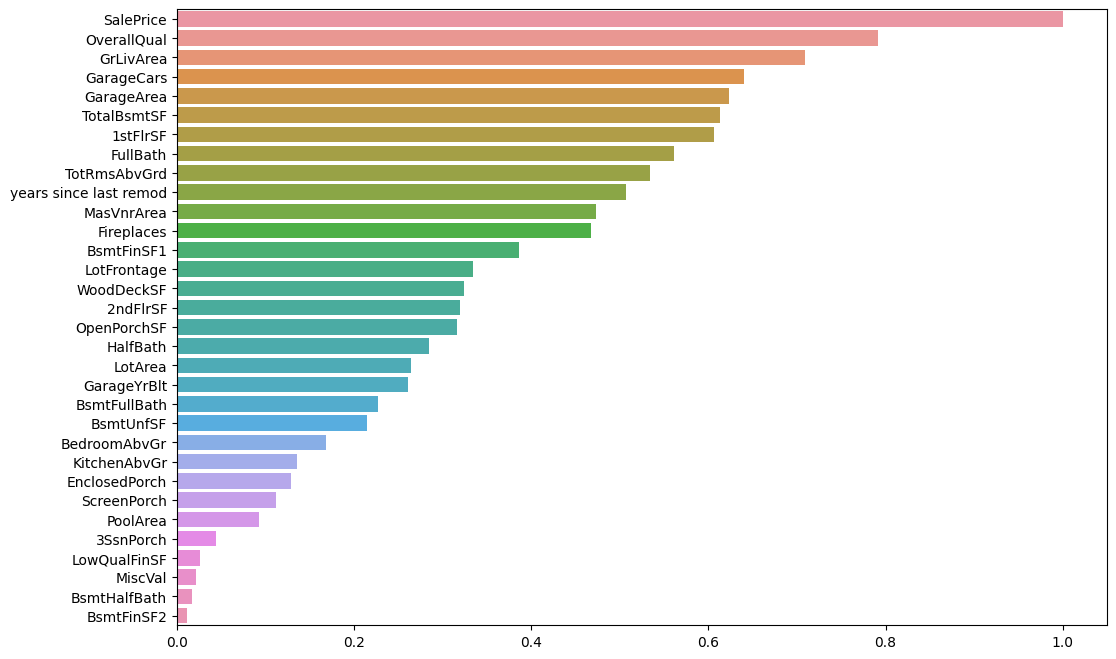

In [60]:
dfCorr = abs(datasetR[fullListNumberAndPrice].corr())
corrSalePrice = dfCorr['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=corrSalePrice.values, y=corrSalePrice.index)
plt.show()

In [61]:
# Suppression des colonnes avec une corrélation inférieure à 40%
less40Percent = list(set(corrSalePrice[corrSalePrice > 0.4].index))
if 'SalePrice' in less40Percent:
    less40Percent.remove('SalePrice')
print(less40Percent)

# Suppression des colonnes avec une corrélation supérieure à 20%
less20Percent = list(set(corrSalePrice[corrSalePrice > 0.2].index))
if 'SalePrice' in less20Percent:
    less20Percent.remove('SalePrice')
print(less20Percent)

['TotalBsmtSF', 'GarageCars', 'years since last remod', 'MasVnrArea', 'OverallQual', 'Fireplaces', 'FullBath', 'TotRmsAbvGrd', 'GrLivArea', 'GarageArea', '1stFlrSF']
['GarageCars', 'OpenPorchSF', 'MasVnrArea', 'WoodDeckSF', 'GarageYrBlt', 'BsmtFinSF1', 'LotArea', 'TotalBsmtSF', 'HalfBath', 'OverallQual', 'LotFrontage', 'GrLivArea', '2ndFlrSF', 'GarageArea', 'BsmtFullBath', '1stFlrSF', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'TotRmsAbvGrd', 'years since last remod']


In [62]:
# Meilleur correlation avec SalePrice
print(linear_regression(datasetR, fullListNumber, 'SalePrice'))
print(linear_regression(datasetR, less40Percent, 'SalePrice'))
print(linear_regression(datasetR, less20Percent, 'SalePrice')) # Meilleur résultat

40972.81035526955
42933.79006564261
40841.44639434635


## Supprimer les colonnes trop similaires

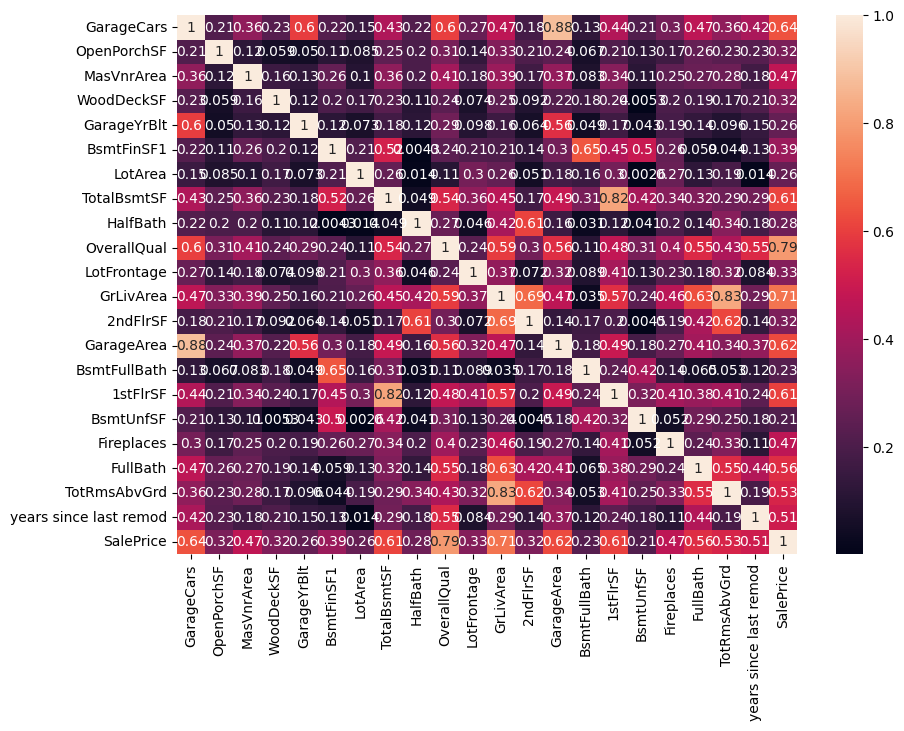

In [63]:
less20Percent.append('SalePrice')
fullListNumber = less20Percent
dfCorr = abs(datasetR[fullListNumber].corr())
plt.figure(figsize=(10,7))
sns.heatmap(dfCorr, annot=True)
plt.show()

On voit que certaines caractéristiques semblent liées:
- Total Bsmt SF et 1st Flr SF
- Garage Cars et Garage Area
- TotRms AbvGrd et Gr Liv Area

Pour éviter d'avoir des informations redondantes, on va supprimer les colonnes qui semblent les moins corrélées avec SalePrice.
- Total Bsmt SF
- GarageArea
- Gr Liv Area

In [64]:
fullListNumber.remove('TotalBsmtSF')
fullListNumber.remove('GarageArea')
fullListNumber.remove('GrLivArea')
print(fullListNumber)

['GarageCars', 'OpenPorchSF', 'MasVnrArea', 'WoodDeckSF', 'GarageYrBlt', 'BsmtFinSF1', 'LotArea', 'HalfBath', 'OverallQual', 'LotFrontage', '2ndFlrSF', 'BsmtFullBath', '1stFlrSF', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'TotRmsAbvGrd', 'years since last remod', 'SalePrice']


In [65]:
fullListNumber.remove('SalePrice')
linear_regression(datasetR, fullListNumber, 'SalePrice')

40970.02044871479

## Intégration des valeurs catégorielles

In [66]:
allCatColumns = list(datasetR.select_dtypes(include=['object']).columns)
print(allCatColumns)

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities', 'YrSold']


Alley - nbre de catégories: 3 - pourcentage de la valeur 1 : 0.9376712328767123


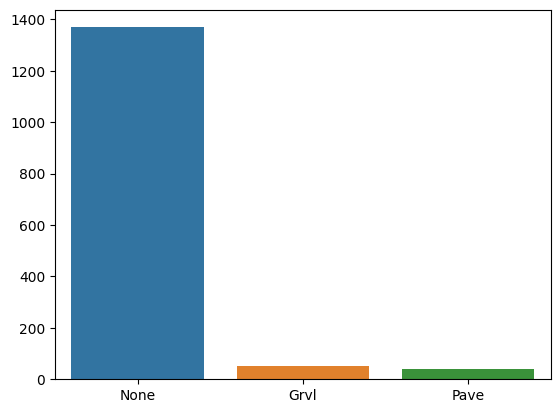

In [67]:
test = datasetR.groupby(datasetR['Alley']).size().sort_values(ascending=False)
sns.barplot(x=list(test.index), y=list(test.iloc[0:]))
print(f"Alley - nbre de catégories: {len(test)} - pourcentage de la valeur 1 : {str(test.iloc[0]/len(datasetR))}")

### Tri parmi les valeurs catégorielles.
### Retirer celles ne variant pas assez ou ayant trop de valeurs différentes

In [68]:
for i in allCatColumns:
    test = datasetR.groupby(datasetR[i]).size().sort_values(ascending=False)
    print(f"{i} - nbre de catégories: {len(test)} - pourcentage de la valeur 1 : {str(test.iloc[0]/len(datasetR))}")

Alley - nbre de catégories: 3 - pourcentage de la valeur 1 : 0.9376712328767123
BldgType - nbre de catégories: 5 - pourcentage de la valeur 1 : 0.8356164383561644
BsmtCond - nbre de catégories: 5 - pourcentage de la valeur 1 : 0.897945205479452
BsmtExposure - nbre de catégories: 5 - pourcentage de la valeur 1 : 0.6527397260273973
BsmtFinType1 - nbre de catégories: 7 - pourcentage de la valeur 1 : 0.2945205479452055
BsmtFinType2 - nbre de catégories: 7 - pourcentage de la valeur 1 : 0.8602739726027397
BsmtQual - nbre de catégories: 5 - pourcentage de la valeur 1 : 0.44452054794520546
CentralAir - nbre de catégories: 2 - pourcentage de la valeur 1 : 0.934931506849315
Condition1 - nbre de catégories: 9 - pourcentage de la valeur 1 : 0.863013698630137
Condition2 - nbre de catégories: 8 - pourcentage de la valeur 1 : 0.9897260273972602
Electrical - nbre de catégories: 5 - pourcentage de la valeur 1 : 0.9143835616438356
ExterCond - nbre de catégories: 5 - pourcentage de la valeur 1 : 0.87808

Une même valeur est présente dans plus de 80% des cas ou un nombre de catégories trop importantes est constatée, nous supprimons ces éléments:
[Alley,BldgType,BsmtCond,BsmtFinType2,CentralAir,Condition1,Condition2,Electrical,ExterCond,Fence,Functional,GarageCond,GarageQual,Heating,LandContour,LandSlope,MiscFeature,PavedDrive,PoolQC,RoofMatl,SaleCondition,SaleType,Street]


In [69]:
toDelete = ['Alley','BldgType','BsmtCond','BsmtFinType2','CentralAir','Condition1','Condition2','Electrical','ExterCond','Fence','Functional','GarageCond','GarageQual','Heating','LandContour','LandSlope','MiscFeature','PavedDrive','PoolQC','RoofMatl','SaleCondition','SaleType','Street']
for i in toDelete:
    allCatColumns.remove(i)
print(allCatColumns)

['BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu', 'Foundation', 'GarageFinish', 'GarageType', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MoSold', 'Neighborhood', 'OverallCond', 'RoofStyle', 'Utilities', 'YrSold']


In [98]:
def linear_regression(datasetR, fit, toPredict):
    fullListNumber = list(datasetR.select_dtypes(include=['int64', 'float64']).columns)
    fullListNumber = fullListNumber[:-1]

    # Normalisation des données
    scaler = preprocessing.StandardScaler()
    dfStand = scaler.fit_transform(datasetR[fullListNumber])
    dfStand = pd.DataFrame(dfStand, columns=fullListNumber)
    datasetR = pd.concat([dfStand, datasetR[toPredict]], axis=1)

    # Création des colonnes catégorielles
    allCatColumns = list(datasetR[fit].select_dtypes(include=['object']).columns)
    dummy_cols = pd.DataFrame()
    for col in allCatColumns:
        col_dummies = pd.get_dummies(datasetR[col], prefix=str(col))
        datasetR = pd.concat([datasetR, col_dummies], axis=1)
        del datasetR[col]
        fit = fit + list(col_dummies.columns)
        fit.remove(col)

    cut = round(len(datasetR)*0.8) # 80% des données
    ds_train = datasetR.iloc[:cut,:].reset_index()
    ds_test = datasetR.iloc[cut:,:] # 20% des données
    # Création du modèle
    lr = linear_model.LinearRegression()
    # Entrainement du modèle
    lr.fit(ds_train[fit], ds_train[toPredict])
    prediction = lr.predict(ds_test[fit])
    # Calcul de l'erreur
    rmse = mean_squared_error(ds_test[toPredict], prediction)**(1/2)
    return rmse

In [103]:
numColumns = fullListNumber.copy() # On garde les colonnes numériques
catColumns = allCatColumns.copy() # On garde les colonnes catégorielles

result = linear_regression(datasetR, ['OverallQual'], 'SalePrice') # On commence avec une seule colonne

newColumns = ['OverallQual'] # On garde la colonne qui donne le meilleur résultat

# On ajoute une colonne à la fois
for i in range(1, len(numColumns)):
    fit = numColumns[:i]
    test = linear_regression(datasetR, fit, 'SalePrice')
    if test < result:
        newColumns = fit.copy()
        result = test
print(newColumns)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallQual']


In [104]:
linear_regression(datasetR, newColumns, 'SalePrice')

40028.8518087135